# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [3]:
#Your code here
df = df.rename(lambda x: x.lower(), axis =1)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [4]:
#Your code here
df = df.set_index('linename')

# Painstakingly change the index back

In [5]:
# Your code here
#df['index'] = range(0, len(df))
#df['linename'] = 
#df = df.set_index('index')
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [6]:
# Your code here
stat_counts = df.station.value_counts()
df['Num_lines'] = df.station.map(lambda x: stat_counts[x])
df = df.sort_values(by = 'Num_lines')

## Write a function to clean a column name.

In [7]:
def clean(col_name):
    #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    cleaned = col_name.title()
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

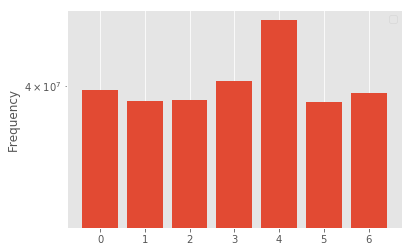

In [27]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
#df['Day'] = df.Date.map(lambda x: datetime.strptime(x, '%M/%d/%Y').weekday())
#x.strptime('%M/%d/%Y').weekday())
#.strftime('%A')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns = df.columns.str.title()
#df.columns

df2 = pd.pivot_table(df, values = ['Entries','Exits'], index = 'Day', aggfunc = 'mean')
#groupby['Day','Entries']

df2.index

plt.style.use('ggplot')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend('0-6: Mon-Sun')
plt.bar(df2.index,df2.Entries)
plt.show()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [45]:
#Your code here
from statistics import mean

day_mean = mean(df2.Entries[0:5])
end_mean = mean(df2.Entries[5:7])
compar = str("It is " + str(day_mean > end_mean) + " that the mean weekday entries is greater than the mean weekend entries")
compar

'It is True that the mean weekday entries is greater than the mean weekend entries'

# Drop a couple of columns

In [49]:
# Your code here
df.drop('C/A', axis =1)

,Linename,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day
38444,J,R435,00-00-01,CLEVELAND ST,BMT,08/31/2018,21:00:00,REGULAR,4890697,4433765,84,2
34415,L,R349,00-00-01,SUTTER AV,BMT,08/28/2018,01:00:00,REGULAR,1364709,371372,84,6
34414,L,R349,00-00-01,SUTTER AV,BMT,08/27/2018,21:00:00,REGULAR,1364709,371293,84,5
34413,L,R349,00-00-01,SUTTER AV,BMT,08/27/2018,17:00:00,REGULAR,1364709,371058,84,5
34412,L,R349,00-00-01,SUTTER AV,BMT,08/27/2018,13:00:00,REGULAR,1364691,370882,84,5
34411,L,R349,00-00-01,SUTTER AV,BMT,08/27/2018,09:00:00,REGULAR,1364460,370819,84,5
34410,L,R349,00-00-01,SUTTER AV,BMT,08/27/2018,05:00:00,REGULAR,1364022,370741,84,5
34409,L,R349,00-00-01,SUTTER AV,BMT,08/27/2018,01:00:00,REGULAR,1364007,370729,84,5
34408,L,R349,00-00-01,SUTTER AV,BMT,08/26/2018,21:00:00,REGULAR,1363952,370679,84,4
34407,L,R349,00-00-01,SUTTER AV,BMT,08/26/2018,17:00:00,REGULAR,1363842,370594,84,4
